Purpose of this notebook: to check whether the statistical analysis in the paper "We look like our names" holds.

Link to paper: https://www.researchgate.net/profile/Jacob_Goldenberg/publication/314103043_We_Look_Like_Our_Names_The_Manifestation_of_Name_Stereotypes_in_Facial_Appearance/links/58b7d4d445851591c5d70ce3/We-Look-Like-Our-Names-The-Manifestation-of-Name-Stereotypes-in-Facial-Appearance.pdf


In [10]:
class HypothesisTest(object):

    def __init__(self, prob):
        self.prob = prob
        self.MakeModel()
        #self.actual = self.TestStatistic(data)

    def PValue(self, iters=1000):
        self.test_stats = [self.TestStatistic(self.RunModel()) 
                           for _ in range(iters)]

        count = sum(1 for x in self.test_stats if x >= self.actual)
        return count / iters

    def TestStatistic(self, data):
        raise UnimplementedMethodException()

    def MakeModel(self):
        pass

    def RunModel(self):
        raise UnimplementedMethodException()

# Study 1A 

In [11]:
from collections import Counter

In [15]:
import random

In [16]:
class FaceNameTest1A(HypothesisTest):

    def TestStatistic(self):
        return test_stat

    def RunModel(self):
        n = 20
        sample = [random.choice('TFFFF') for _ in range(20)]
        counter = Counter(sample)
        data = counter['T'], counter['F']
        return data

In [27]:
test1A = FaceNameTest1A(0.2)
test1A.RunModel()

(2, 18)

Important data: 

- One hundred twenty-one Israeli students from alocal online panel (60 women, all native speakers, Mage = 27.77 years [SD  4.08]) participated in the study in return for the equivalent of US$2.30.
- We presented 20 photos (10 female) one at a time on a computer screen. For each target, five suggested given names appeared below the headshot, including the true name of the depicted person and four filler names
-  First, we created for each participant a proportion score that averaged his or her accurate choices and then computed the mean accuracy proportion for all participants.

Let's write a function for the outcome of an individual experiment.

In [50]:
def one_person_experiment():
    "Returns proportion score."
    sample = [random.choice('TFFFF') for _ in range(20)]
    counter = Counter(sample)
    trues = counter['T']
    return trues / 20
    

In [51]:
one_person_experiment()

0.35

Now, we can define a group experiment.

In [55]:
def group_experiment():
    "Returns mean proportion score."
    samples = [one_person_experiment() for _ in range(121)]
    return sum(samples) / len(samples)

In [63]:
group_experiment()

0.1975206611570246

Let's now do this 10000 times and plot a cumulative histogram.

In [64]:
outcomes = [group_experiment() for _ in range(10000)]

In [65]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')

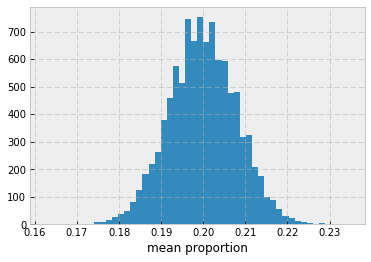

In [70]:
plt.hist(outcomes, bins=50);
plt.xlabel('mean proportion')

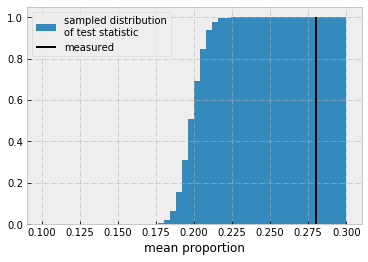

In [76]:
plt.hist(outcomes, bins=50, range=(0.1, 0.3), cumulative=True, normed=True, label='sampled distribution\nof test statistic');
plt.xlabel('mean proportion')
plt.vlines(0.28, 0, 1, label='measured')
plt.legend()

# Experiment 1B 

Ruling out popularity. 

In [77]:
def one_person_experiment():
    "Returns proportion score."
    sample = [random.choice('TFFF') for _ in range(25)]
    counter = Counter(sample)
    trues = counter['T']
    return trues / 25

In [87]:
one_person_experiment()

0.28

In [88]:
def group_experiment():
    "Returns mean proportion score."
    samples = [one_person_experiment() for _ in range(64)]
    return sum(samples) / len(samples)

In [98]:
group_experiment()

0.25437499999999996

In [99]:
outcomes = [group_experiment() for _ in range(10000)]

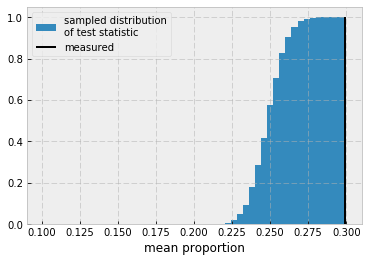

In [101]:
plt.hist(outcomes, bins=50, range=(0.1, 0.3), cumulative=True, normed=True, label='sampled distribution\nof test statistic');
plt.xlabel('mean proportion')
plt.vlines(0.2991, 0, 1, label='measured')
plt.legend()